# Exercise 4.1

In [60]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [61]:
b0 = 5
b1 = 10

In [62]:
def randgenerate(n):
    x = []
    y = []
    for i in range(n):
        x.append(random.uniform(1,100))
        epsilon = random.normalvariate(0,1)
        y.append(b0 + b1*np.log(x[i]) + epsilon)
    return x,y

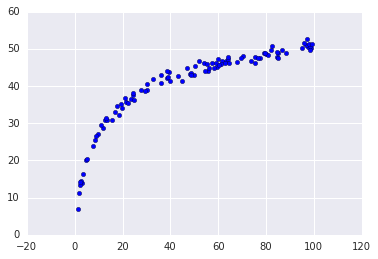

In [63]:
randx, randy = randgenerate(100)
randx = np.array(randx)
randy = np.array(randy)
plt.scatter(randx,randy)

In [64]:
randx = randx.reshape(-1,1)

In [65]:
lr = make_pipeline(PolynomialFeatures(2), LinearRegression())
model1 = lr.fit(randx, randy)
model1.score(randx, randy)

0.92530864521619205

In [66]:
y_pred = model1.predict(randx)

In [67]:
randlogx = np.log(randx)
randlogx = randlogx.reshape(-1,1)

In [68]:
lr2 = LinearRegression()
model2 = lr2.fit(randlogx, randy)
model2.score(randlogx, randy)

0.99100837684982013

In [69]:
y_pred2 = model2.predict(randlogx)

# Exercise 4.2

In [77]:
b2 = 0.05

In [78]:
def randgeneratesq(n):
    x = []
    y = []
    for i in range(n):
        x.append(random.uniform(1,100))
        epsilon = random.normalvariate(0,1)
        y.append(b0 + b1*(x[i]) + b2*(x[i])**2 + 50*epsilon)
    return x,y

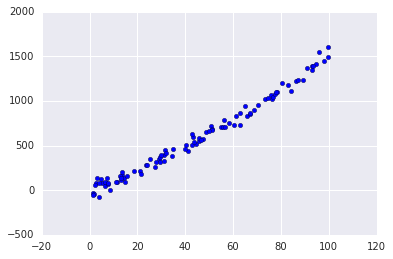

In [79]:
randx2, randy2 = randgeneratesq(100)
randx2 = np.array(randx2)
randy2 = np.array(randy2)
plt.scatter(randx2, randy2)

In [80]:
randx2 = randx2.reshape(-1,1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(randx2, randy2, test_size = 0.2)

In [18]:
lr3 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model3 = lr.fit(X_train, y_train)
model3.score(X_test, y_test)

0.98262020624860513

In [19]:
ypredtrain = model3.predict(X_train)
ypredtest = model3.predict(X_test)

In [20]:
mean_squared_error(y_train, ypredtrain)

2144.9090109243934

In [21]:
mean_squared_error(y_test, ypredtest)

3111.875837439819

# Exercise 4.3

In [22]:
def polymodel(n):
    trainerr = 0
    testerr = 0
    testsco = 0
    aic = 0
    lr = make_pipeline(PolynomialFeatures(n), LinearRegression())
    model = lr.fit(X_train, y_train)
    
    testsco = model.score(X_test, y_test)
    ypredtrain = model.predict(X_train)
    ypredtest = model.predict(X_test)
    trainerr = mean_squared_error(y_train, ypredtrain)
    testerr = mean_squared_error(y_test, ypredtest)
    return trainerr, testerr, testsco, aic
    

In [23]:
trainerr = []
testerr = []
testsco = []
aic = []

In [24]:
for num in range(8):
    tnrr, ttrr, ttso, ac = polymodel(num)
    trainerr.append(tnrr)
    testerr.append(ttrr)
    testsco.append(ttso)
    aic.append(ac)

(0, 10000)

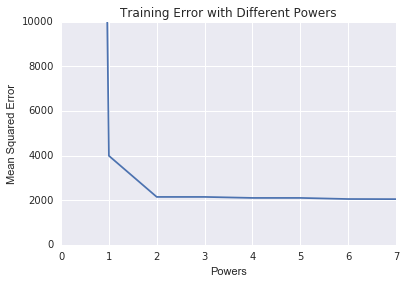

In [92]:
powers = range(0,8)
plt.plot(powers, trainerr)
plt.title('Training Error with Different Powers')
plt.xlabel('Powers')
plt.ylabel('Mean Squared Error')
plt.ylim(0,10000)

(0, 10000)

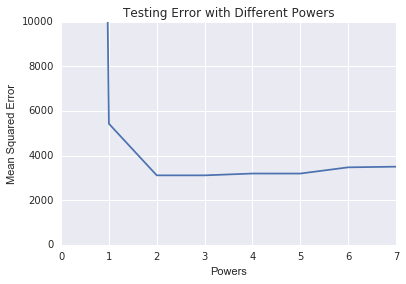

In [91]:
plt.plot(powers, testerr)
plt.title('Testing Error with Different Powers')
plt.xlabel('Powers')
plt.ylabel('Mean Squared Error')
plt.ylim(0, 10000)

(0.8, 1)

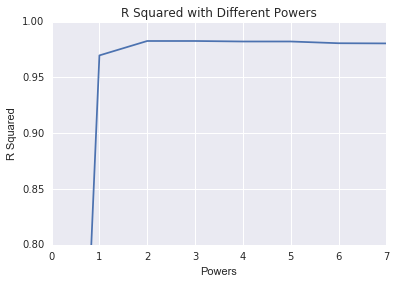

In [90]:
plt.plot(powers, testsco)
plt.title('R Squared with Different Powers')
plt.xlabel('Powers')
plt.ylabel('R Squared')
plt.ylim(0.8,1)

# Exercise 4.4

In [82]:
def traintest(modelpoints, X_train, X_test, y_train, y_test):
    trainerror = 0
    testerror = 0
    X_train = X_train[0:modelpoints]
    y_train = y_train[0:modelpoints]
    lr = make_pipeline(PolynomialFeatures(2), LinearRegression())
    model = lr.fit(X_train, y_train)
    ypredtrain = model.predict(X_train)
    ypredtest = model.predict(X_test)
    trainerror = mean_squared_error(y_train, ypredtrain)
    testerror = mean_squared_error(y_test, ypredtest)
    return trainerror, testerror

In [85]:
trainerrorlist = []
testerrorlist = []
m = range(1, 105, 5)

In [86]:
for modpts in range(1, 105, 5):
    trainerror, testerror = traintest(modpts, X_train, X_test, y_train, y_test)
    trainerrorlist.append(trainerror)
    testerrorlist.append(testerror)
print trainerrorlist
print testerrorlist

[0.0, 1056.9593721378021, 1289.0957114065397, 1435.5588934193379, 1348.3085774340066, 1647.4490651950837, 1650.4296580161199, 1811.9716417166928, 1797.2964885177105, 2112.5590072466152, 2080.1828858701974, 2281.3703659663629, 2394.1873567488137, 2496.0183414765957, 2356.901053380423, 2237.4451506598502, 2135.2417244806252, 2135.2417244806252, 2135.2417244806252, 2135.2417244806252, 2135.2417244806252]
[1451148.5405439097, 4482.0300798767612, 2937.7645599772336, 3075.9693940960442, 2857.3376600248985, 2781.0241126772821, 2902.0968646658753, 2539.1553070344298, 2416.2703107389175, 2509.2341042930293, 2588.0217222168508, 2527.8888568794137, 2306.0105528431541, 2295.411332056331, 2304.9143413055472, 2260.3286484366427, 2279.451751856217, 2279.451751856217, 2279.451751856217, 2279.451751856217, 2279.451751856217]


(0, 5000)

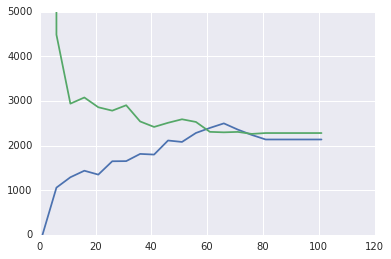

In [89]:
plt.plot(m, trainerrorlist)
plt.plot(m, testerrorlist)
plt.ylim(0, 5000)